(14376, 7)


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should pr


epoch:0 train_loss:0.021009062292003593 val_loss:2.55761213618643e-06
save best_model now_val_best_loss is:2.55761213618643e-06



epoch:1 train_loss:3.841823319931752e-05 val_loss:2.9689016171289652e-05



epoch:2 train_loss:3.7097417273886756e-05 val_loss:1.3446522591221362e-06
save best_model now_val_best_loss is:1.3446522591221362e-06



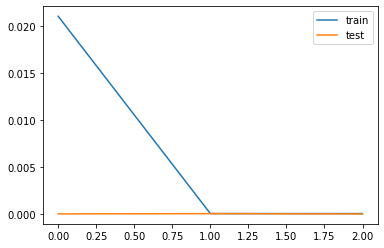

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

In [5]:
import requests
import gc
gc.collect()
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_公司.csv',index_col=0)
print(df.shape)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/0ac62d4a6efe4b7f9cc58ff8ff614aca7603fa25/bert_train_pipeline.py'
exec(requests.get(url).text)
qustion = 'What is the company name?'
model_path = '../models/Product_Data_SQuAD_model_公司.pt'
res,table = bert_train_pipeline(train_df,val_df,qustion,model_path,start_idx_from_0=True)

In [6]:
res

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.928686,0.830668,0.830668,0.998609,1.0


In [7]:
table.sample(10)

,Y_label,predict,是否全對
8293,FORMOSA CHEMICALS AND FIBRE CORP,FORMOSA CHEMICALS AND FIBRE CORP,Yes
16805,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATIONNO,No
20126,NAN YA PLASTICS CORPORATION,NAN YA PLASTICS CORPORATION,Yes
1277,FORMOSA PLASTICS CORPORATION,FORMOSA PLASTICS CORPORATION,Yes
4090,NAN YA PLASTICS CORPORATION,NAN YA PLASTICS CORPORATION,Yes
5819,FORMOSA CHEMICALS AND FIBRE CORP,FORMOSA CHEMICALS AND FIBRE CORP,Yes
6788,FORMOSA PLASTICS CORPORATION,FORMOSA PLASTICS CORPORATION,Yes
1434,FORMOSA PLASTICS CORPORATION,FORMOSA PLASTICS CORPORATION,Yes
16027,NAN YA PLASTICS CORP,NAN YA PLASTICS CORP3F,No
1288,FORMOSA PLASTICS CORPORATION,FORMOSA PLASTICS CORPORATION,Yes


In [8]:
table[table['是否全對']=='No'].sample(10)

,Y_label,predict,是否全對
7729,NAN YA PLASTICS CORP,NAN YA PLASTICS CORP201,No
19275,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATION201,No
16113,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATION201TUNG,No
4630,FORMOSA CHEMICALS ANDFIBRE CORPORATION,FORMOSA CHEMICALS ANDFIBRE CORPORATION201,No
1645,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATION201,No
2217,NAN YA PLASTICS CORP,NAN YA PLASTICS CORP3F,No
3026,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATIONNO201,No
5576,FORMOSA CHEMICALS AND FIBRECORPORATION,FORMOSA CHEMICALS AND FIBRECORPORATION201,No
18719,FORMOSA CHEMICALS ANDFIBRE CORPORATION,FORMOSA CHEMICALS ANDFIBRE CORPORATION201,No
16055,NAN YA PLASTICS CORP,NAN YA PLASTICS CORPNO101SHUIGUAN,No
